In this tutorial
----------------
The objective of this tutorial is to practice setting up Hadoop on AWS:
1. Get a free tier account
2. Set up as many instances as needed (within the free capacity)
3. Launch and stop the instances
4. Use the setup.sh on each cluster node 
5. Practice MapReduce examples with Hadoop

### Get a free tier account

Go to https://aws.amazon.com/free to check out what a free tier account is all about. Although services and resources are limited for such an account, they are free for the first year anyway, and the EC2 micro service is all we need for this lab.  

### Set up EC2 instances

*   Go to the AWS management console page, you will see content like this:

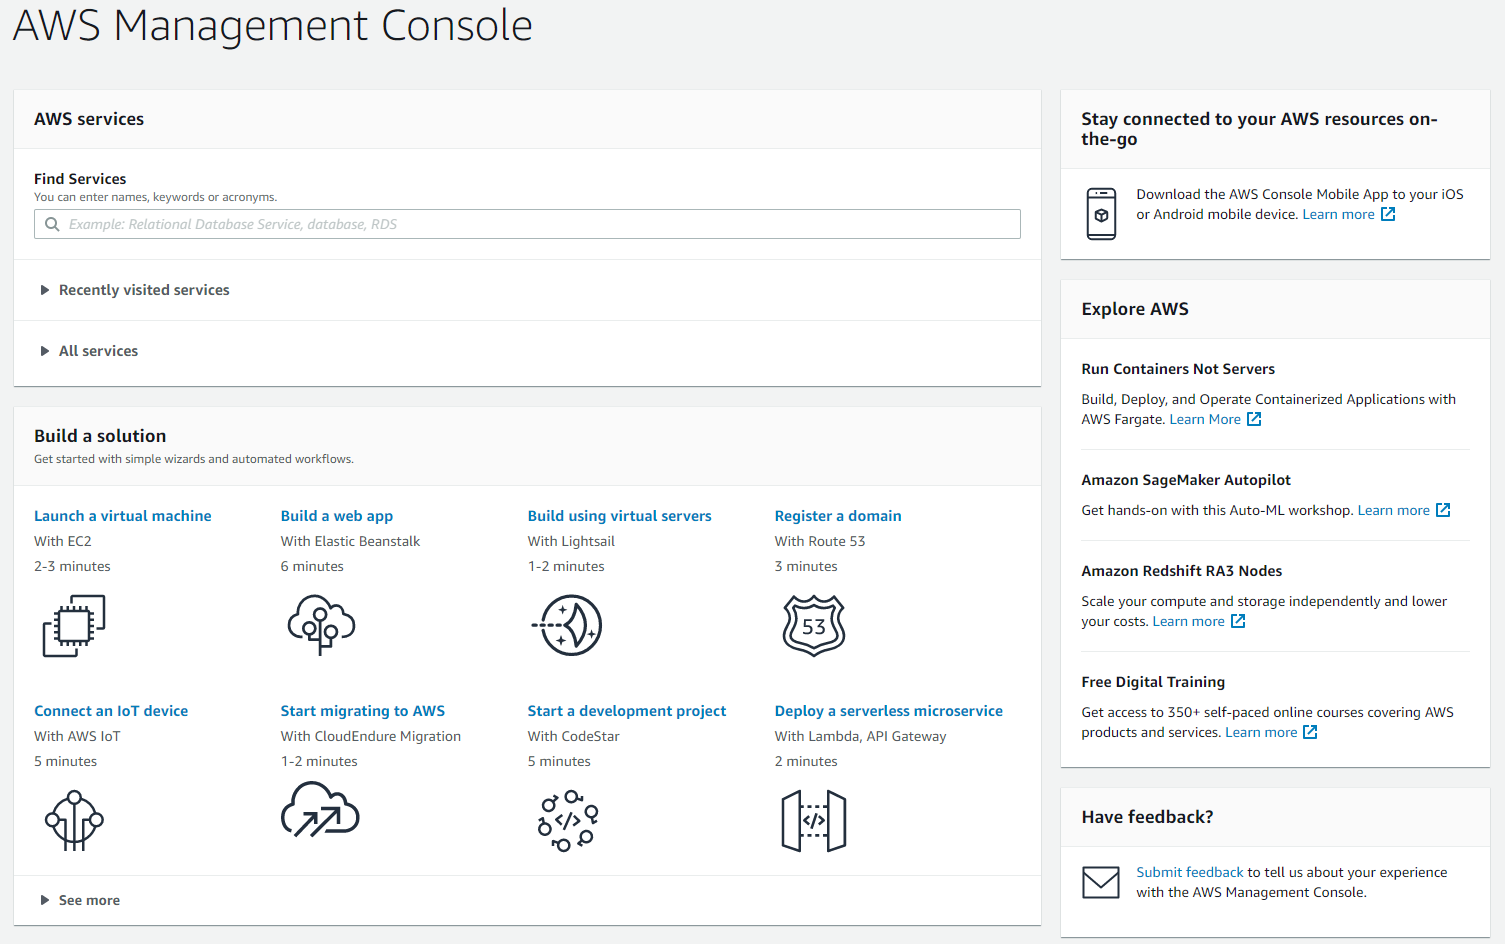

*   Under the "Build a solution" panel, click on the "Launch a virtual machine" option, then you will enter the instance set-up process with a start page like this:

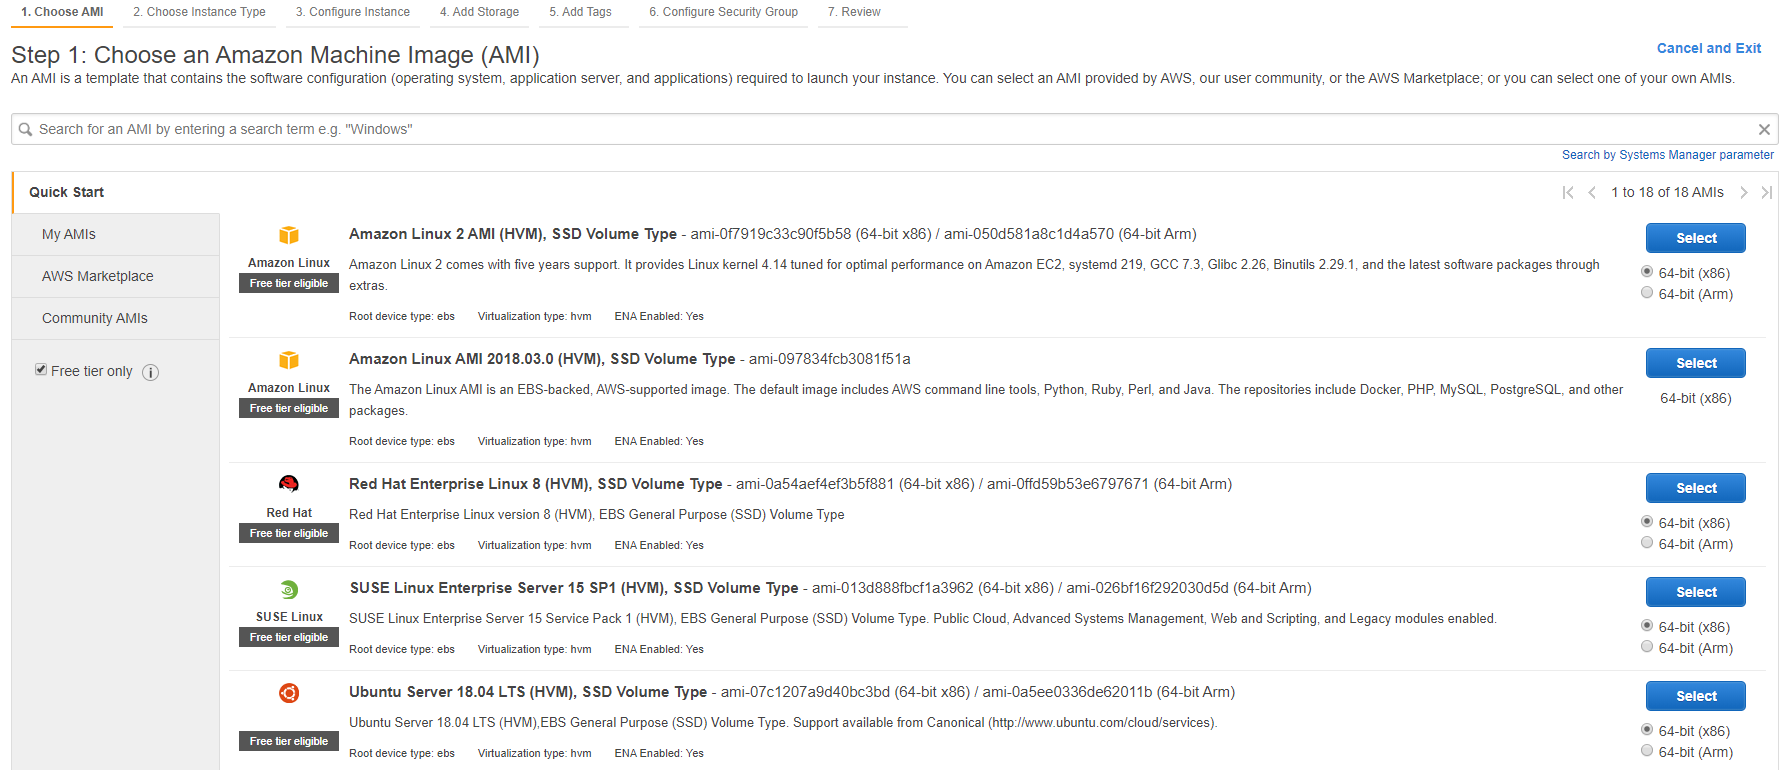

*   Select any Ubuntu server as your instance type, and choose t2.micro shown below:

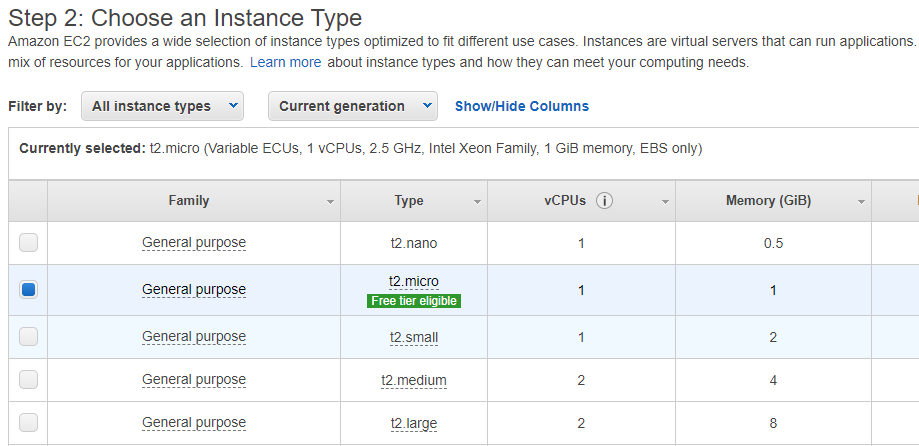


*   Set the number of instances to be 4 if you want to set up a cluster with 4 servers. In the case of a single node Hadoop, leave it to be 1 as default. 

*   It is advisable to choose a subnet for all of them, so we can add more instances later into the same subnet for the convenience of intercommunication.

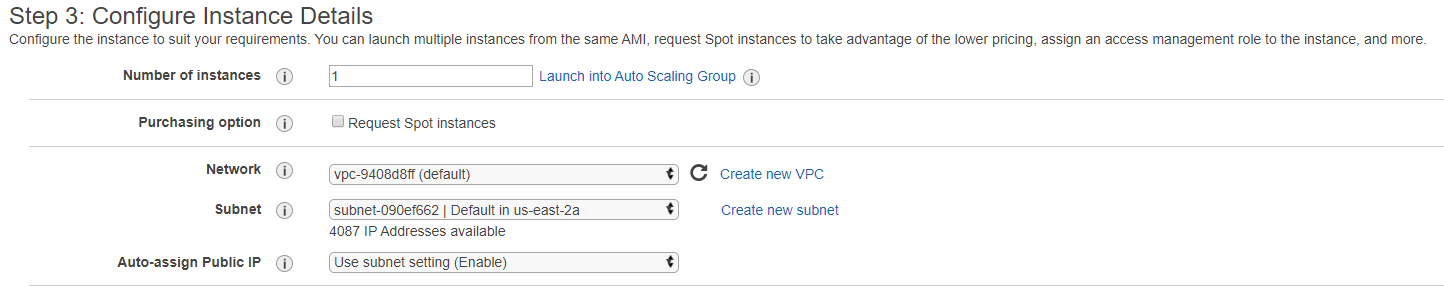



*   In the storage step, leave as default and click next.
*   In the tag step, add a tag pair "Name" using any name you want to idenfity with. For example, we can give the name node in the cluster a name "Hadoop-NameNode".
*   In the security group step, it is advisable to choose the type "All traffic" for the purpose of testing. We can choose an exsiting security group later if we already configured this once.
*   Finally, it is time to review the overall configuration and click Launch to start all the instances at once. If you have no security key pair, create a new one following the instructions. **Keep the private key for later use in the Hadoop setup process**


### Launch and stop the instances

You can go to the "Instances" page in your dashboard to check out the status of all your instances. After launching for the first time, the status will automatically be running, and **their uptime (which is limited by AWS for a free tier account) is being gauged until you stop them**. It is important to remember to stop them if you leave away from your work, or you will pay for the extra time!

Be careful with terminate, use stop if you only want to suspend the server. A terminated server cannot be started again!

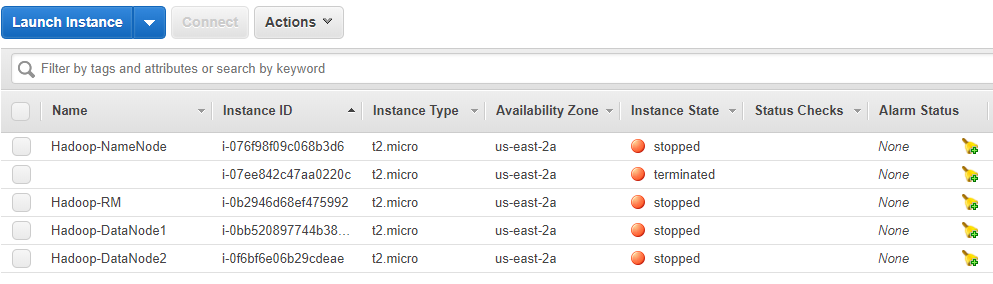

### Use the setup.sh for one-stop installation and configuration

Upon launching all the instances, upload the setup.sh on the NameNode first and run it under the home directory. It's an interactive shell script, so follow the instructions all the way through until the NameNode is set up successfully. Repeat the process through all the rest of the DataNodes.

What setup.sh takes care of:
1. install JAVA
2. install Hadoop
3. configure cluster nodes

Tips & tricks:

*   Hadoop provides plenty of low-level configurations while setup.sh offers the minimal version. It's advisable to experiment with more options to dig into the power of Hadoop.
*   Use jps command to check if Hadoop is working properly: usually the necessary daemons are namenode, datanode, secondarynamenode, resourcemanager and nodemanager. If any of them is not running, there is probably an issue.
*   If you caught an error in the middle of the way and had no idea how to go back, the advice is to reboot the server and start it over again.
*   Remember to clear up the caches files (under /tmp if not configured) before you do the "namenode -format" command.




### Practice MapReduce examples with Hadoop

Upon completion of Hadoop setup, we can start off with trivial examples to get a taste of MapReduce tasks.

Usually we run Hadoop on jar files. Summarized as several steps:
1. Implement MapReduce tasks in java files
2. Compile .java file using javac command (e.g. javac -classpath ${HADOOP_CLASSPATH} -d wordcount_classes WordCount.java)
3. Get jar file using jar command (e.g. jar -cvf wc.jar -C wordcount_classes)
4. Run the jar file with input and output on HDFS (e.g. hadoop jar wc.jar WordCount input output)